In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from plotnine import *
import warnings

In [2]:
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [3]:
#importing datafile from the system 
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [4]:
#reading the file 
import io
df = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']))
print(df)

           Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code Region         Category Sub-Categ

In [5]:
#checking if there are some null values in the dataset
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
#entire dataframe
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#various parameters set for different columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
#number of columns and rows
df.shape

(9994, 13)

In [9]:
#copy is made 
df.duplicated().sum()

17

In [10]:
#counting the number of unique values in each column
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
#deleting all duplicate values from the dataframe
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [12]:
#deletingn the data of the column
col=['Postal Code']
ss=df.drop(columns=col,axis=1)

In [13]:
#calculating correlation between different attributes
ss.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [14]:
#calculating covariance between different attributes
ss.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


In [15]:
ss.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


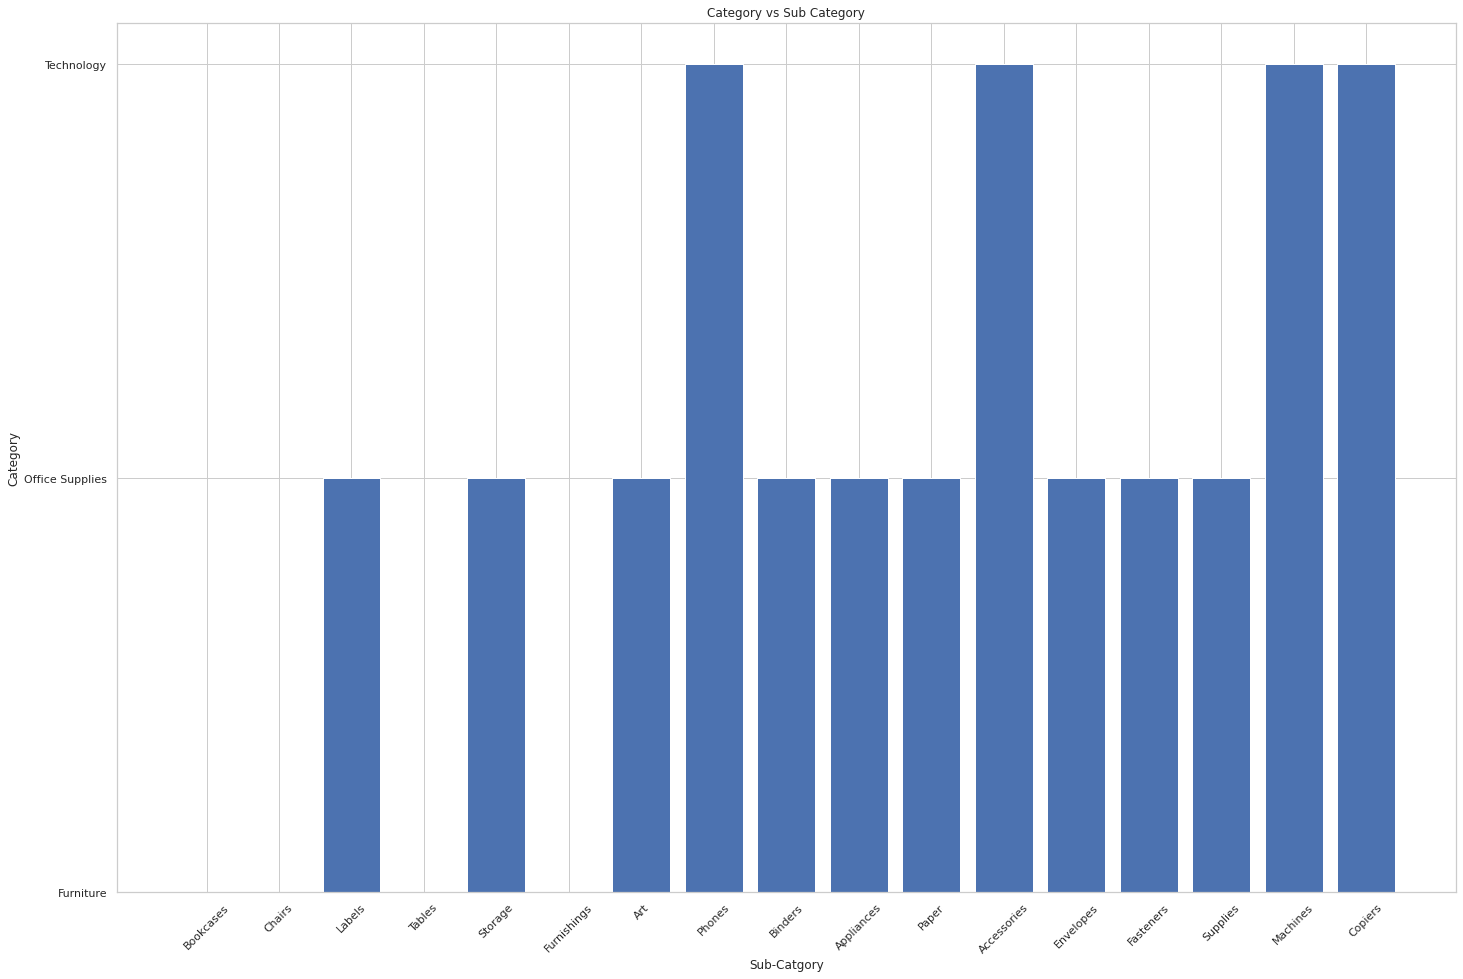

In [34]:
#plot of categories and sub-categories
plt.figure(figsize=(24,16))
plt.title('Category vs Sub Category')
plt.bar('Sub-Category','Category', data=ss)
plt.ylabel('Category')
plt.xlabel('Sub-Catgory')
plt.xticks(rotation=45)
plt.show()

In [17]:
ss.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


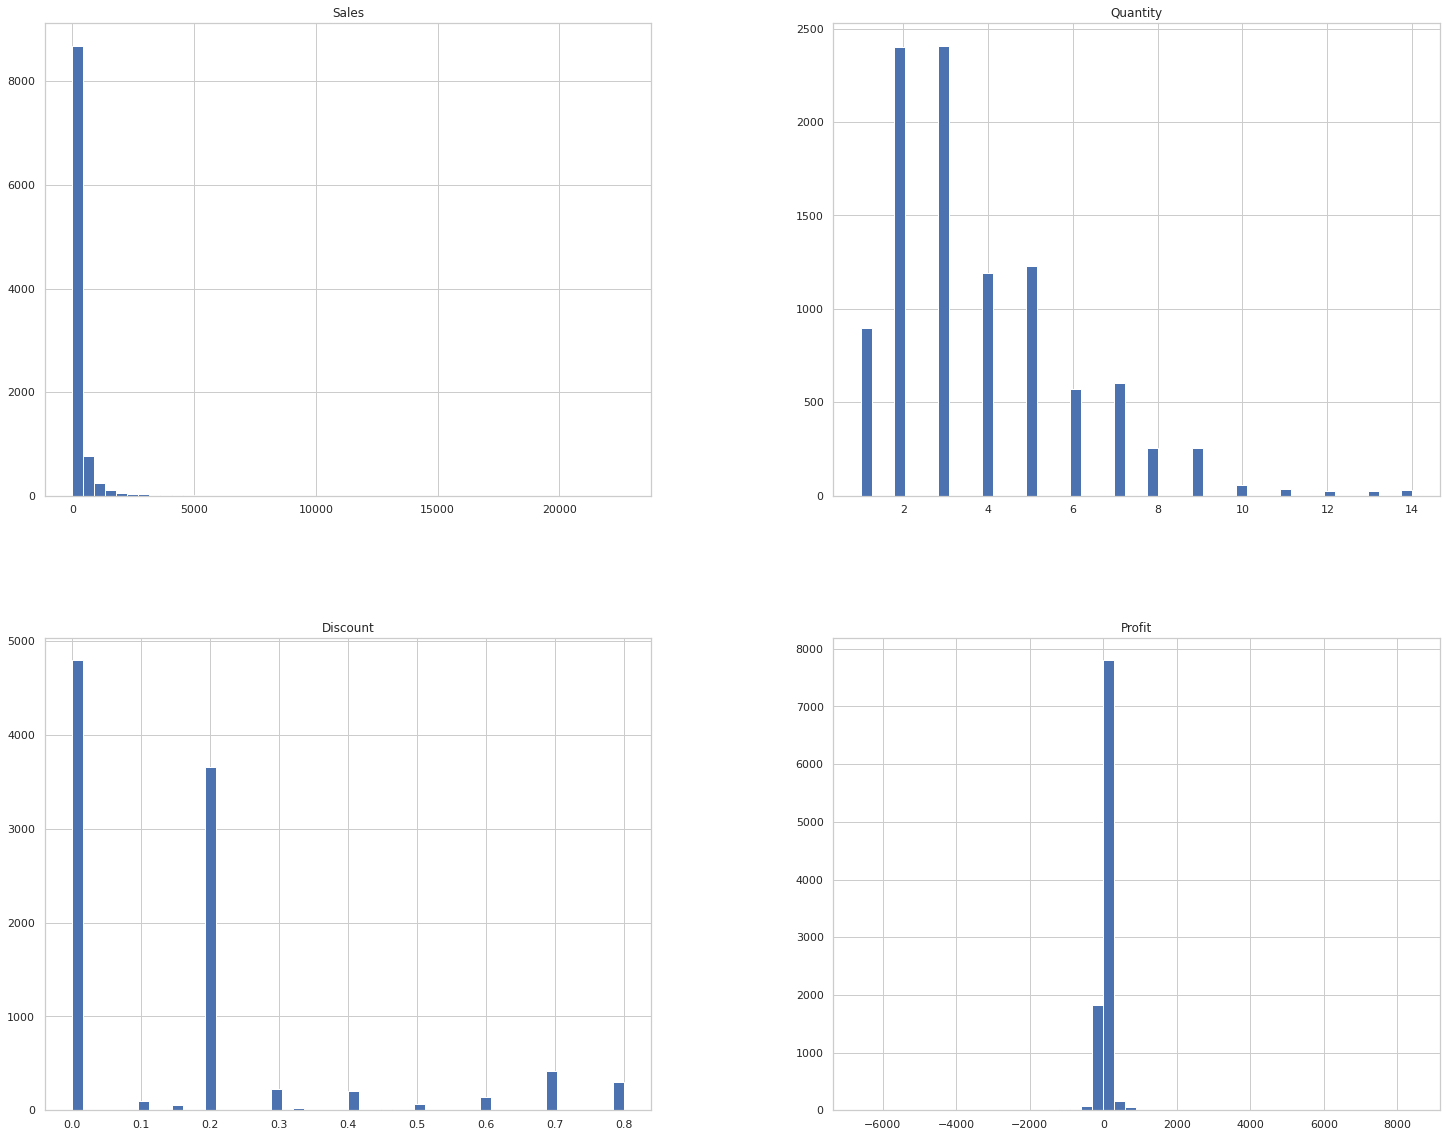

In [35]:
#histogram is made for all 4 attributes-Sales, Quantity, Discount and Profit
ss.hist(bins=50 ,figsize=(25,20))
plt.show();

From the histogram we can see that the data isn't normal because intitially the values are very high and then the values are drrastically low. 

In [19]:
ss['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

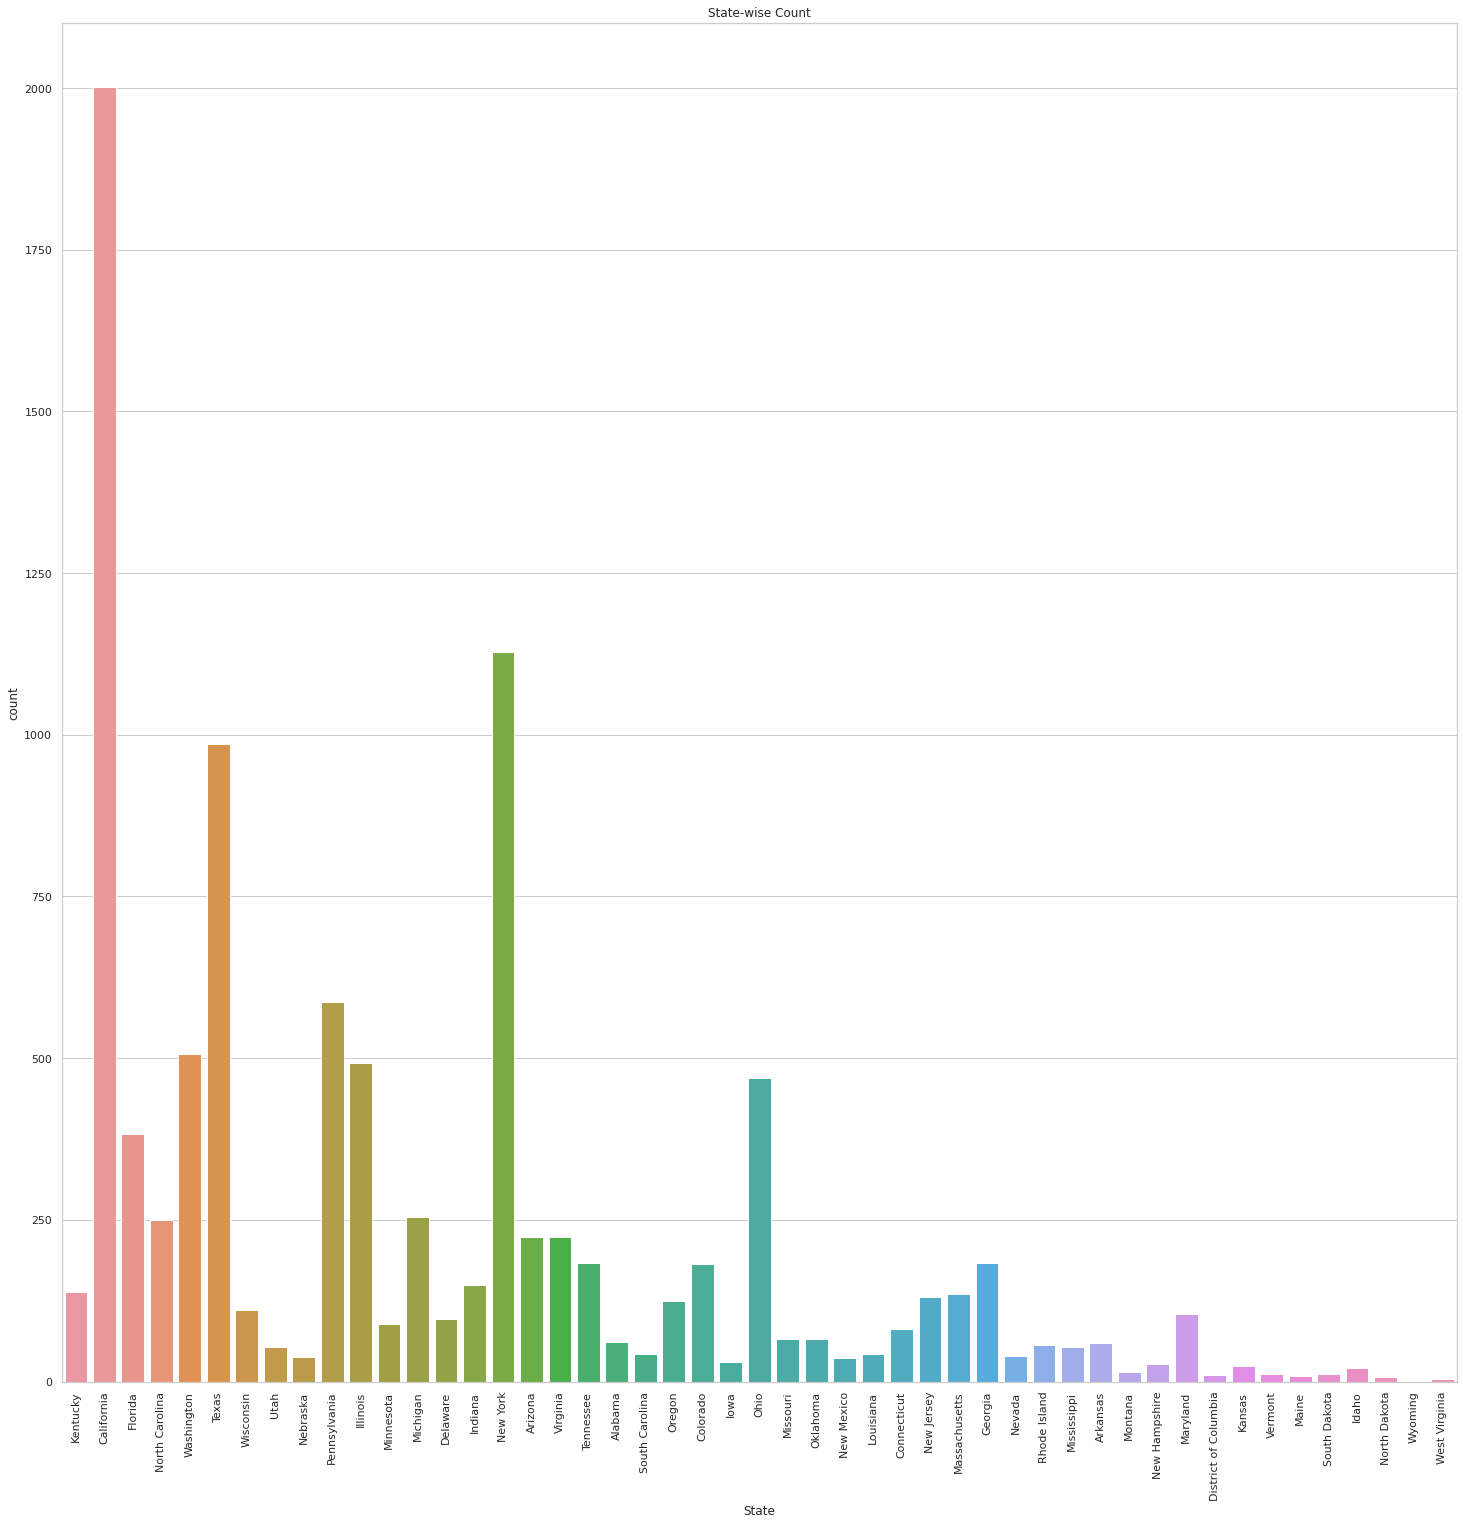

In [36]:
#plotting the graph of state-wise count
plt.figure(figsize=(25,25))
sns.countplot(x=ss['State'])
plt.xticks(rotation=90)
plt.title("State-wise Count")
plt.show()

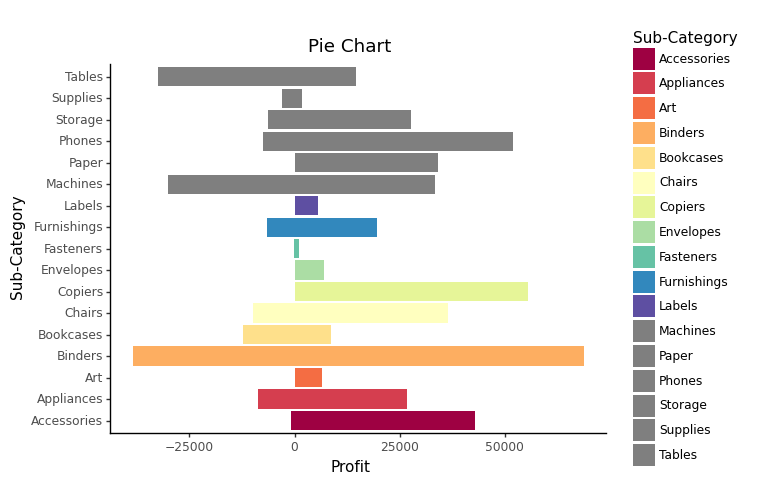

<ggplot: (8767001132743)>

In [24]:
#Plotting the profits of each subquery
Profit = (ggplot(df, aes(x='Sub-Category', y='Profit', fill='Sub-Category')) + geom_col() + coord_flip()+ scale_fill_brewer(type='div', palette="Spectral") + theme_classic() + ggtitle('Pie Chart'))
display(Profit)





*   The Pie chart shows the profit-loss of all subcategories.Here from graph we can visualize that "binders" sub-category has suffered the highest amount of loss and profit amongst all subcategories (this could be because of extra discounts provided)
*   Some categories including "Accessories","Copiers","Paper"are totally in profit and as they have zero loss.
*   One category "Fasteners" have no loss no profit situation.
*   The companies "Tables", "Machines" and "Binders" have the highest losses in the sub-categories.







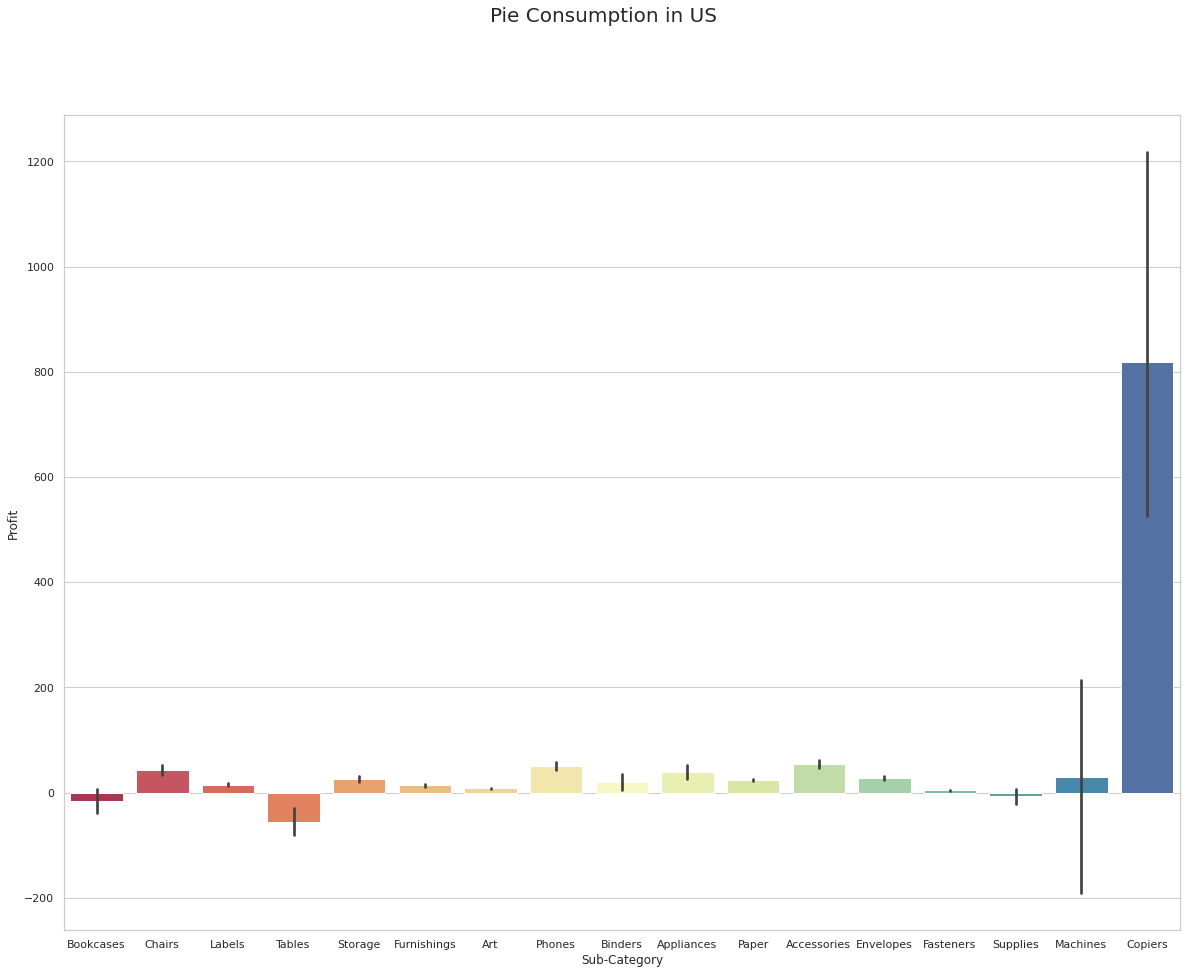

In [26]:
#Plot of pie consumption in US
sns.set(style="whitegrid")
plt.figure(2, figsize=(20,15))
sns.barplot(data=df,x='Sub-Category',y='Profit', palette='Spectral',color="darkblue")
plt.suptitle('Pie Consumption in US', fontsize=20)
plt.show()

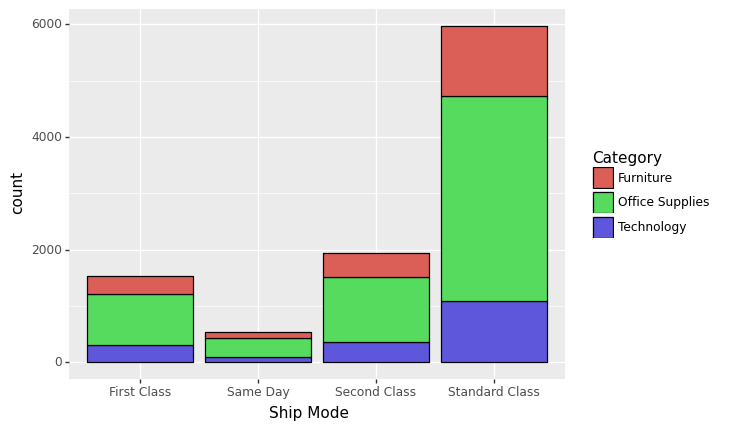

<ggplot: (8766991253297)>

In [27]:
#plot of the count of items that are shipped on different days
ggplot(df, aes(x='Ship Mode', fill = 'Category')) + geom_bar(stat = 'count',color="black")

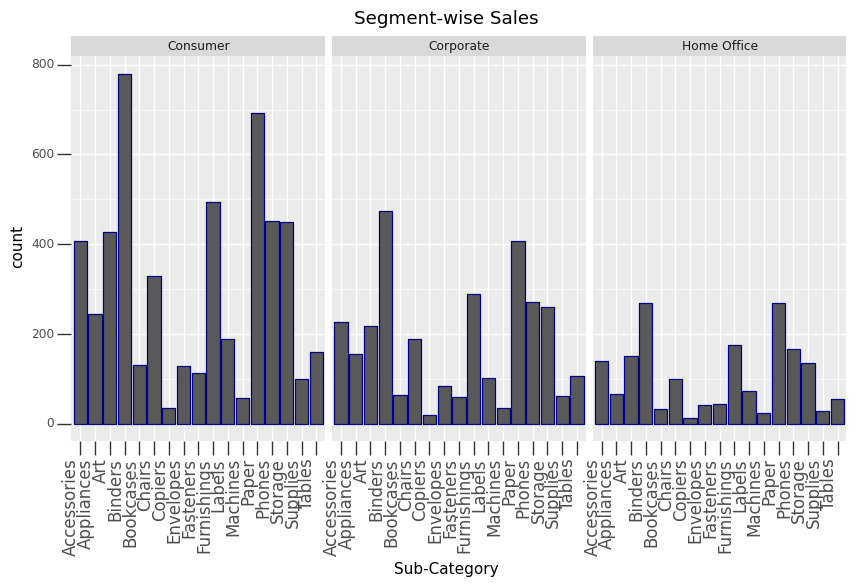

<ggplot: (8766992484934)>

In [28]:
#Plot of the sales depending upon the segments- Consumer, Corporate and Home-office
label = theme(axis_text_x = element_text(angle=90, hjust=1),figure_size=(10,5),axis_ticks_length_major=10,axis_ticks_length_minor=5)
(ggplot(df, aes(x='Sub-Category', fill='Sales')) + geom_bar(color="darkblue") + facet_wrap(['Segment']) 
+ label +theme(axis_text_x = element_text(size=12))+ggtitle("Segment-wise Sales"))



*  From above Graph we can say that "Home Office" segment has purchased lower amount of the Sub-Categories and in those "Tables","Supplies","Machines","Copiers","Bookcases" have the lowest Sales.
*    "Consumer" has purchased more sub-categories as compared to other segments.




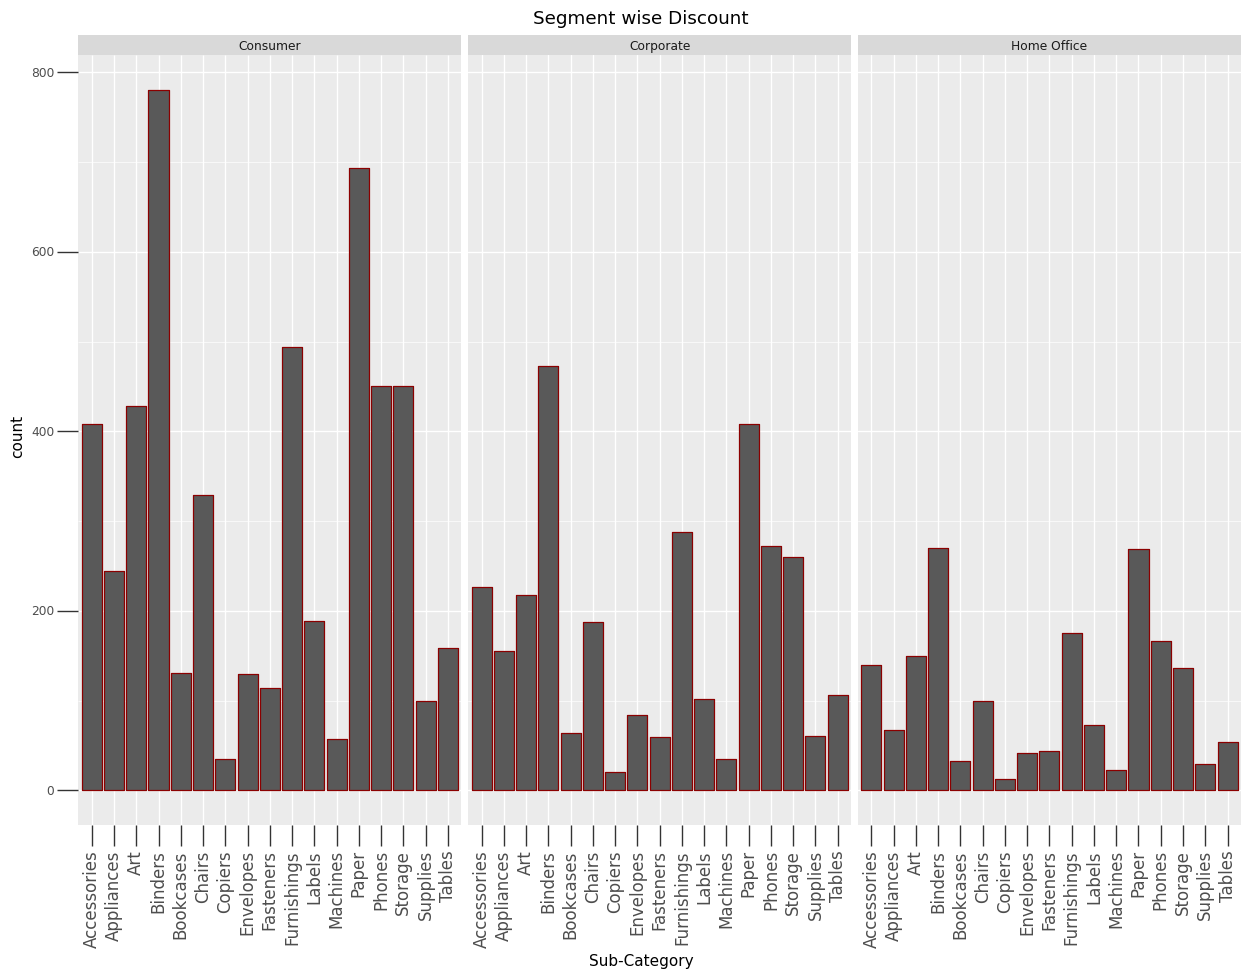

<ggplot: (8766992707024)>

In [29]:
#Plot of the discounts depending upon the segments- Consumer, Corporate and Home-office
label = theme(axis_text_x = element_text(angle=90, hjust=2),figure_size=(15,10),axis_ticks_length_major=15,axis_ticks_length_minor=5)
(ggplot(df, aes(x='Sub-Category', fill='Discount')) + geom_bar(color="darkred") + facet_wrap(['Segment']) + label +theme(axis_text_x = element_text(size=12))+ggtitle("Segment wise Discount"))

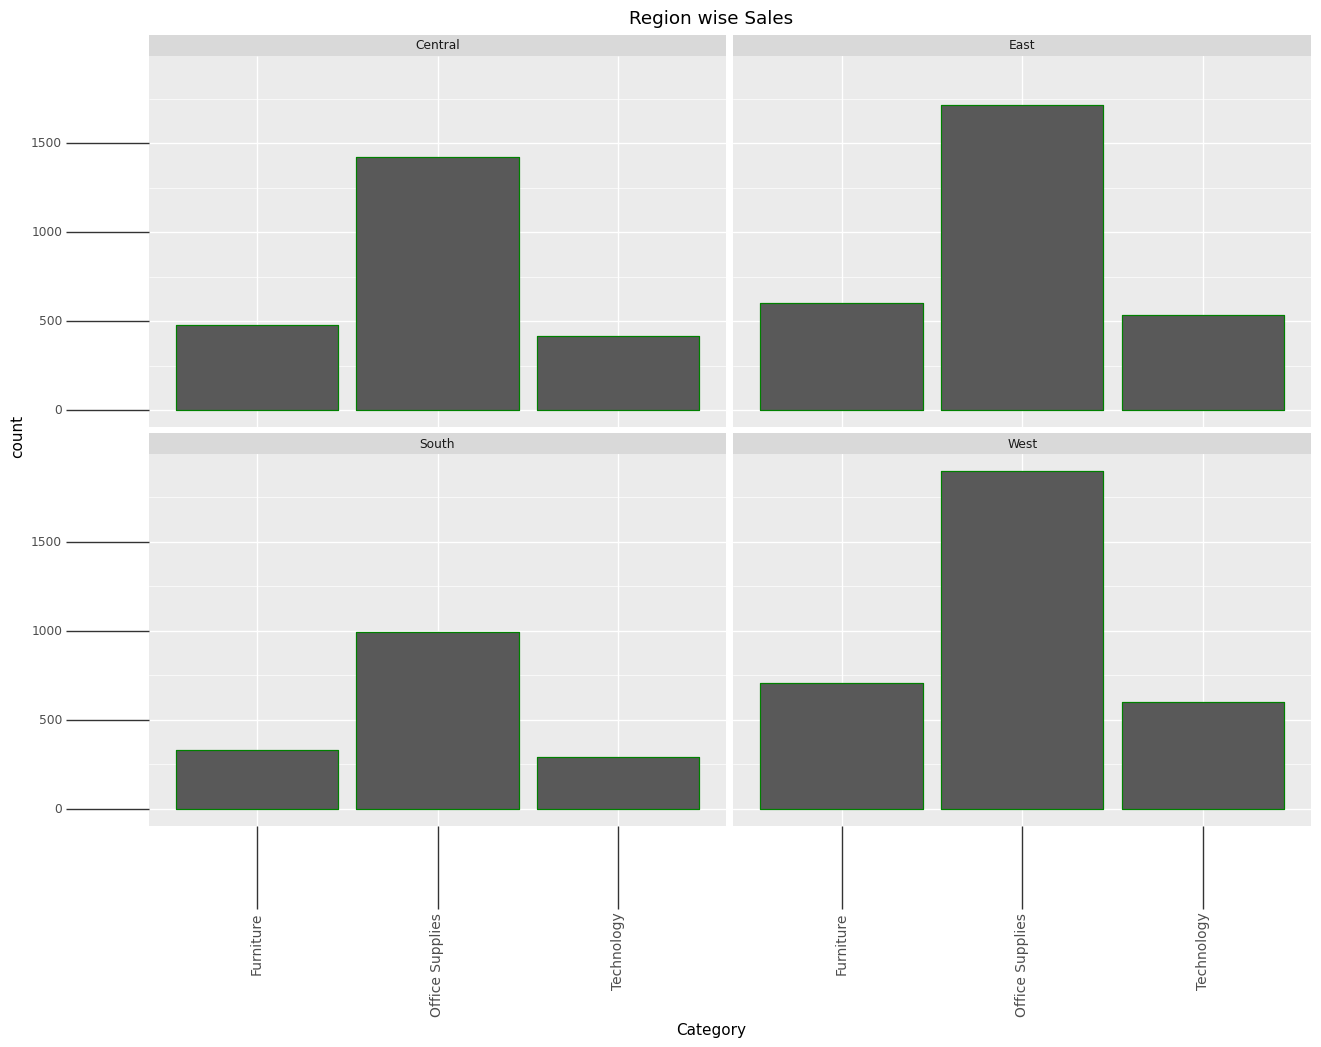

<ggplot: (8766990695232)>

In [31]:
#Plot of region-wise sales
label = theme(axis_text_x = element_text(angle=90, hjust=10),figure_size=(15,10),axis_ticks_length_major=60,axis_ticks_length_minor=60)
(ggplot(ss, aes(x='Category', fill='Sales')) + geom_bar(color="green") + theme(axis_text_x = element_text(size=10)) + facet_wrap(['Region']) + label+ ggtitle("Region wise Sales"))

In [32]:
# making sub-plots from the main plot dpending upon state
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
ss['state_code'] = ss.State.apply(lambda st: state_code[st])

In [33]:
st_data = ss[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()
figure = go.Figure(data=go.Choropleth(locations=st_data.index, z = st_data.Sales, locationmode = 'USA-states', colorscale = 'Reds',colorbar_title = 'Sales(USD)'))
figure.update_layout(title_text = 'State-Wise Sales',height=1000,geo_scope='usa')
figure.show()

In [38]:
x = df.iloc[:, [9, 10, 11, 12]].values

from sklearn.cluster import KMeans
ss2= []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 15, random_state = 0).fit(x)
    ss2.append(kmeans.inertia_)

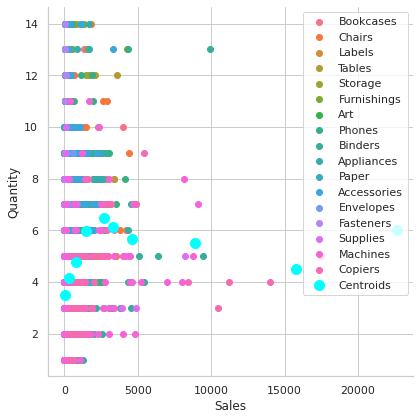

In [40]:
sns.set_style("whitegrid") 
sns.FacetGrid(df, hue ="Sub-Category",height = 6).map(plt.scatter,'Sales','Quantity')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'cyan', label = 'Centroids')

plt.legend()
plt.show()